In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [61]:
salary_df = pd.read_csv('dataset/Salary_dataset.csv')
salary_df.head()

,ID,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [62]:
# get X values, years experience
X = salary_df['YearsExperience'].values
# get y values, salary
y = salary_df['Salary'].values

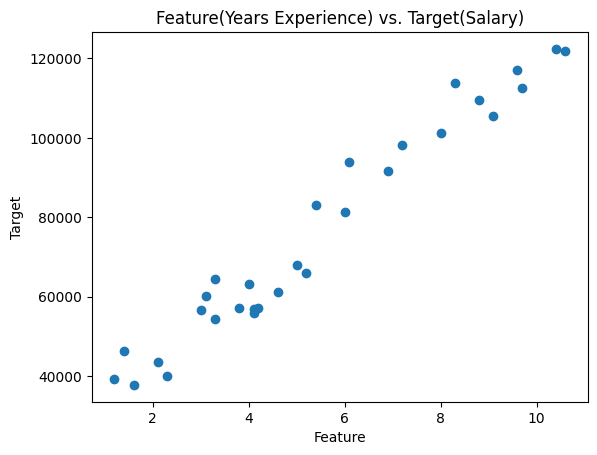

In [63]:
# visualize data
plt.scatter(X, y)
plt.title("Feature(Years Experience) vs. Target(Salary)")
plt.xlabel('Feature')
plt.ylabel('Target')

plt.show()

In [64]:
# Reshape X to be a two-dimensional array
X = X.reshape(-1, 1)

# Add a column of ones to X to account for the intercept term
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Initialize coefficients (theta) to zeros
theta = np.zeros(2)


In [65]:
# loss function --> min of RMSE, obtained by subtracting the prediced vals from actual vals
def compute_rmse(y, X, theta):
    m = len(y)
    y_hat = X.dot(theta)
    error = (y_hat - y) ** 2
    return np.sqrt(np.sum(error) / m)


In [66]:
# gradient descent --> return theta, cost_history
"""//notes//
Gradient descent is where the magic happens. Not really just math. Fine tunes theta vector
Optimization algo for finding the minimum of a function
the steps are:
1) begin at random point(in this case all 0s)
2) Determine gradient of position--> derivative of loss function with respect to each parameter
3) Move towards higher gradient relative to last position. Size of move is determined by learning rate
4) Repeat until gradient is at global min
"""
def gradient_descent(y, X, theta, learning_rate, iterations):
    m = len(y)
    # initialize loss_history to size of iterations
    loss_history = np.zeros(iterations)

    # loop through hyperparam iterations

    for i in range(iterations):
        prediction = X.dot(theta)
        # compare prediction to val according similar to this equation: β = (X transposed * X)^(-1) * X transposed*Y
        # above is analytical approach, solved in one step, gradient descent is an iterative solution
        theta = theta - (1/m) * learning_rate * X.T.dot(prediction - y)
        # call loss_function!! and add to loss history at index i
        loss_history[i] = compute_rmse(y, X, theta)
        # loss_history essentialy tracks loss for current val theta at iteration i
    return theta, loss_history

In [67]:
# set hyperparams: learning rate, itererations
# determines speed at which min loss is found, higher learning rate takes larger steps but could overshoot optimal val
# Low learning rate may cause the algo to find a local min not global and cause underfitting
# other more complex factors outside the scope of this--> validation set, learning rate schedules. gradient behavior
learning_rate = 0.01
epochs = 20

In [68]:
# run gradient descent
theta, loss_history = gradient_descent(y, X, theta, learning_rate, epochs)

print(theta)
print(loss_history)

[ 2807.2446626  12683.89234325]
[50950.23490748 32986.28960873 22495.21673312 16768.31551221
 13933.5098039  12660.51457739 12122.48382809 11897.02519106
 11797.46770775 11747.41204167 11716.64150829 11693.37168856
 11673.03215758 11653.85415461 11635.15371129 11616.66639441
 11598.28994902 11579.9848018  11561.73560419 11543.53636959]


Given the outputted theta values [2333.18887093, 12642.42701049] we can interpret as so: Salary = 2333.19 + 12642.43*YearsOfExprience

Along with that, the outputted loss_history shows that the gradient descent is working as loss goes down every iteration.

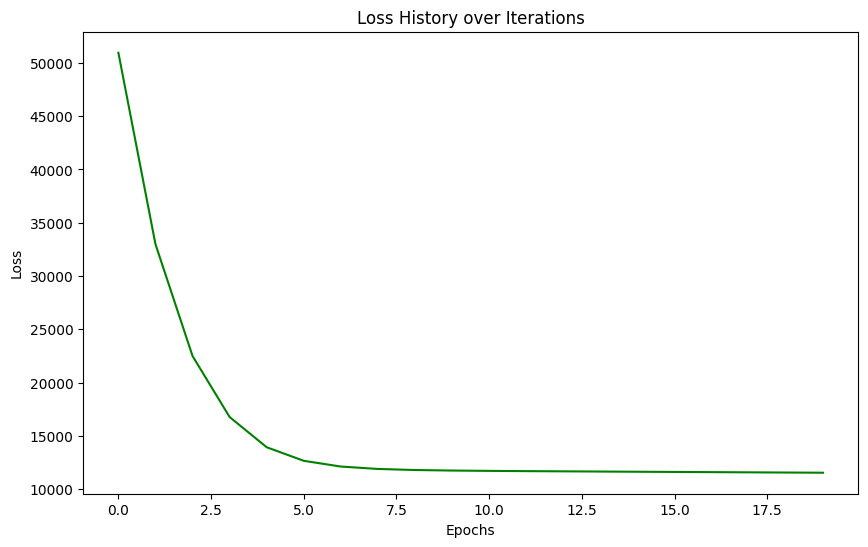

In [71]:
# plotting the loss
plt.figure(figsize=(10, 6))
plt.plot(range(epochs), loss_history, color='green')
plt.title('Loss History over Iterations')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [ ]:
# calculate r2
y_pred = years_exp.dot(theta)
r2 = r_squared(y, salary_hat)
print(f'R-squared: {r2}')

R-squared: 0.810045657379497


In [ ]:
# predict function
# uses the learned coefficients from gradient descent method
def predict(years_exp, theta):
    return np.dot(years_exp, theta)

In [74]:
# make prediction
years_exp = 8
years_exp_sample = np.array([1, years_exp])  
salary_sample_pred = predict(years_exp_sample, theta)
print(f'Given {years_exp} years of experience, the predicted salary is: {salary_sample_pred}')

Given 8 years of experience, the predicted salary is: 104278.38340858491
